In [1]:
from concreteproperties.material import Concrete, SteelBar, SteelStrand
from concreteproperties.stress_strain_profile import (
    ConcreteLinear,
    RectangularStressBlock,
    SteelElasticPlastic,
    StrandProfile,
)
from sectionproperties.pre.library.primitive_sections import rectangular_section
from concreteproperties.pre import add_bar, add_bar_rectangular_array
from concreteproperties.prestressed_section import PrestressedSection

In [2]:
concrete = Concrete(
    name="40 MPa Concrete",
    density=2.4e-6,
    stress_strain_profile=ConcreteLinear(elastic_modulus=30e3),
    ultimate_stress_strain_profile=RectangularStressBlock(
        compressive_strength=40,
        alpha=0.79,
        gamma=0.87,
        ultimate_strain=0.003,
    ),
    flexural_tensile_strength=3.8,
    colour="lightgrey",
)

steel = SteelBar(
    name="500 MPa Steel",
    density=7.85e-6,
    stress_strain_profile=SteelElasticPlastic(
        yield_strength=500,
        elastic_modulus=200e3,
        fracture_strain=0.05,
    ),
    colour="grey",
)

strand = SteelStrand(
    name="1830 MPa Strand",
    density=7.85e-6,
    stress_strain_profile=StrandProfile(
        yield_strength=1500,
        elastic_modulus=200e3,
        fracture_strain=0.035,
        breaking_strength=1830,
    ),
    colour="slategrey",
    prestress_force=900e3,
)

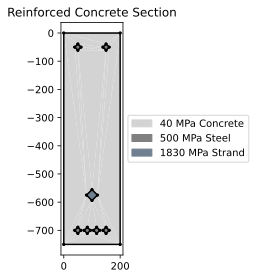

<AxesSubplot: title={'center': 'Reinforced Concrete Section'}>

In [3]:
geom = rectangular_section(d=750, b=200, material=concrete)

# add top steel bars
geom = add_bar_rectangular_array(
    geometry=geom, area=250, material=steel, n_x=2, x_s=100, anchor=(50, 700)
)

# add bottom steel bars
geom = add_bar_rectangular_array(
    geometry=geom, area=250, material=steel, n_x=4, x_s=100/3, anchor=(50, 50)
)

# add prestressing strand
geom = add_bar(
    geometry=geom,
    area=750,
    material=strand,
    x=100,
    y=750-575,
).shift_section(y_offset=-750)

conc_sec = PrestressedSection(geometry=geom)
conc_sec.plot_section()

In [4]:
gross_props = conc_sec.get_gross_properties()
gross_props.print_results(fmt=".3e")

    Gross Concrete Section Properties     
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Property                  ┃      Value ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ Total Area                │  1.500e+05 │
│ Concrete Area             │  1.477e+05 │
│ Lumped Reinforcement Area │  1.500e+03 │
│ Strand Area               │  7.500e+02 │
│ Axial Rigidity (EA)       │  4.883e+09 │
│ Mass (per unit length)    │  3.723e-01 │
│ Perimeter                 │  1.900e+03 │
│ E.Qx                      │ -1.884e+12 │
│ E.Qy                      │  4.883e+11 │
│ x-Centroid                │  1.000e+02 │
│ y-Centroid                │ -3.859e+02 │
│ E.Ixx_g                   │  9.694e+14 │
│ E.Iyy_g                   │  6.429e+13 │
│ E.Ixy_g                   │ -1.884e+14 │
│ E.Ixx_c                   │  2.424e+14 │
│ E.Iyy_c                   │  1.546e+13 │
│ E.Ixy_c                   │ -2.812e-01 │
│ E.I11                     │  2.424e+14 │
│ E.I22                     │  1.546e+13 │
│ Principal Axis Angle      │  0.000e+00 │
│ E.Zxx+                    │  6.282e+11 │
│ E.Zxx-                    │  6.657e+11 │
│ E.Zyy+                    │  1.546e+11 │
│ E.Zyy-                    │  1.546e+11 │
│ E.Z11+                    │  6.282e+11 │
│ E.Z11-                    │  6.657e+11 │
│ E.Z22+                    │  1.546e+11 │
│ E.Z22-                    │  1.546e+11 │
│ Ultimate Concrete Strain  │  3.000e-03 │
│ n_prestress               │  9.000e+05 │
│ m_prestress               │ -1.702e+08 │
└───────────────────────────┴────────────┘

In [5]:
m_ext = 400e6
cr = conc_sec.calculate_cracked_properties(m_ext=m_ext)

from rich.pretty import pprint
pprint(cr.m_cr/1e6)

377.2494665043552

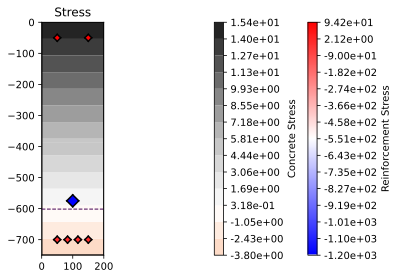

<AxesSubplot: title={'center': 'Stress'}>

In [6]:
res = conc_sec.calculate_uncracked_stress(m=cr.m_cr)
res.plot_stress()

In [7]:
res.sum_moments()

(377236722.4982793, 2.565148459798866e-07, 377236722.4982793)

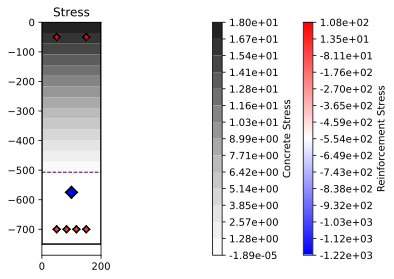

<AxesSubplot: title={'center': 'Stress'}>

In [8]:
res = conc_sec.calculate_cracked_stress(cracked_results=cr)
res.plot_stress()

In [9]:
res.sum_forces()

1.0477378964424133e-09

In [10]:
res.sum_moments()

(399982360.00004566, -1.761716214613228e-08, 399982360.00004566)

In [11]:
print(cr.d_nc)

507.02051982311764


In [12]:
pprint(res)

StressResult(
│   concrete_section=<concreteproperties.prestressed_section.PrestressedSection object at 0x0000025452F9E580>,
│   concrete_analysis_sections=[
│   │   <concreteproperties.analysis_section.AnalysisSection object at 0x00000254146A8910>
│   ],
│   concrete_stresses=[
│   │   array([-1.88744157e-05,  1.79826682e+01,  1.79826682e+01, -1.88744157e-05,
│   │   1.58127653e+01,  1.62093020e+01,  1.66058388e+01,  1.62093020e+01,
│   │   1.62093020e+01,  1.58127653e+01,  1.62093020e+01,  1.66058388e+01])
│   ],
│   concrete_forces=[(903653.9225029771, -4.7923766655787495e-14, 118.01131163625581)],
│   meshed_reinforcement_sections=[],
│   meshed_reinforcement_stresses=[],
│   meshed_reinforcement_forces=[],
│   lumped_reinforcement_geometries=[
│   │   <concreteproperties.pre.CPGeom object at 0x00000254121C0880>,
│   │   <concreteproperties.pre.CPGeom object at 0x00000254121C07C0>,
│   │   <concreteproperties.pre.CPGeom object at 0x000002545308B1F0>,
│   │   <concreteproperties.pre.CPGeom object at 0x000002545301C640>,
│   │   <concreteproperties.pre.CPGeom object at 0x000002545301CA30>,
│   │   <concreteproperties.pre.CPGeom object at 0x000002545301CBE0>
│   ],
│   lumped_reinforcement_stresses=[
│   │   108.06201359597569,
│   │   108.06201359597569,
│   │   -45.629717568842594,
│   │   -45.629717568842594,
│   │   -45.629717568842594,
│   │   -45.629717568842594
│   ],
│   lumped_reinforcement_strains=[
│   │   0.0005403100679798785,
│   │   0.0005403100679798785,
│   │   -0.00022814858784421296,
│   │   -0.00022814858784421296,
│   │   -0.00022814858784421296,
│   │   -0.00022814858784421296
│   ],
│   lumped_reinforcement_forces=[
│   │   (27015.503942675532, -50.00000000000002, 238.08597801315113),
│   │   (27015.503942675532, 49.99999999999997, 238.08597801315113),
│   │   (-11407.429621782887, -50.00000000000002, -411.914021986849),
│   │   (-11407.429621782887, -16.666667000000032, -411.914021986849),
│   │   (-11407.429621782887, 16.666666999999975, -411.914021986849),
│   │   (-11407.429621782887, 49.99999999999997, -411.914021986849)
│   ],
│   strand_geometries=[<concreteproperties.pre.CPGeom object at 0x000002545301C7C0>],
│   strand_stresses=[-1216.0735820877185],
│   strand_strains=[-0.006080367910438592],
│   strand_forces=[(-912055.2119011957, -2.842170943040401e-14, -286.91402198684887)]
)